### This notebook handles external example_hardness data and convert them to example_hardness class

In [39]:
import sys
import os
import json
import pickle
import numpy as np
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from miae.sample_metrics.external_metric import ExternalMetric

import miae.eval_methods.sample_hardness as sample_hardness
hardness_dir = '/Users/eliwang2332/Documents/GitHub/MIAE/experiment/mia_comp/external_example_hardness/cifar10'
# these are hardness that's calculated for CIFAR-10
hardness_list = ['deepsvdd', 'gradient_norm', 'aleatoric_uncertainty', 'epistemic_uncertainty']
hardness_save_dir = '/Users/eliwang2332/Documents/GitHub/MIAE/experiment/mia_comp/external_example_hardness_processed/cifar10'
if not os.path.exists(hardness_save_dir):
    os.makedirs(hardness_save_dir)

In [40]:
import matplotlib.pyplot as plt
def plot_hist(data, title, xlabel, ylabel, bins=20):
    """
    This function is used to plot a histogram of the data.
    :param data: the data to be plotted
    :param title: the title of the plot
    :param xlabel: the label of the x-axis
    :param ylabel: the label of the y-axis
    :return: None
    """
    plt.hist(data, bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

deepsvdd shape: (60000,)
	max: 1.0


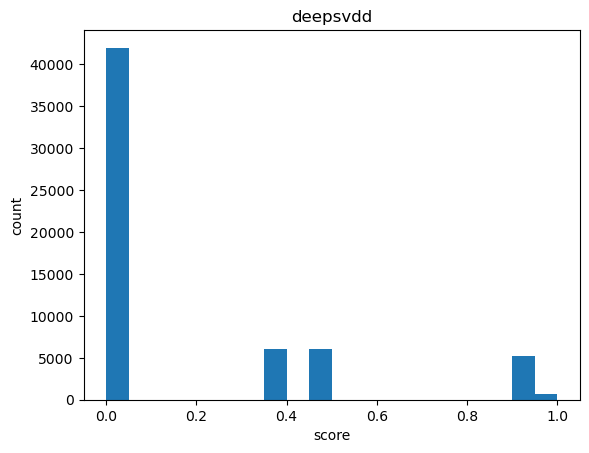

In [41]:
# deepsvdd
deepsvdd_path = os.path.join(hardness_dir, 'deepsvdd_results', "full_cifar10_ResNet.json")

with open(deepsvdd_path, 'r') as f:
    deepsvdd_list = json.load(f).items() # list of (index, score) pairs
    deepsvdd_list = [(int(k), float(v)) for k, v in deepsvdd_list]
    
# sort the list by the order of the image
deepsvdd_list = sorted(deepsvdd_list, key=lambda x: int(x[0]))
scores = np.array(deepsvdd_list)[:, 1]
print(f"deepsvdd shape: {scores.shape}")
print(f"\tmax: {np.max(scores)}")
with open(os.path.join(hardness_save_dir, f"deepsvdd_score.pkl"), "wb") as f:
    pickle.dump(scores, f)
    
plot_hist(scores, "deepsvdd", "score", "count")
    

gradient_norm shape: (60000,)
	max: 42.250330241845916


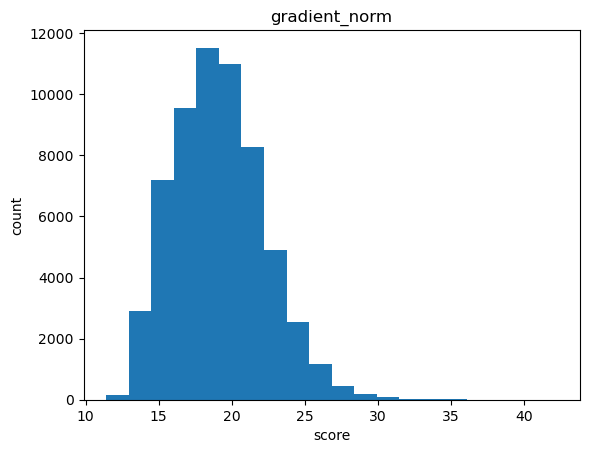

In [42]:
# gradient_norm
gradient_norm_path = os.path.join(hardness_dir, 'gradient_norm_results', "full_wrn28-1_ensemble_all.json")

with open(gradient_norm_path, 'r') as f:
    gradient_norm_list = json.load(f).items() # list of (index, score) pairs
    gradient_norm_list = [(int(k), float(v)) for k, v in gradient_norm_list]
    
# sort the list by the order of the image
gradient_norm_list = sorted(gradient_norm_list, key=lambda x: int(x[0]))
scores = np.array(gradient_norm_list)[:, 1]
print(f"gradient_norm shape: {scores.shape}")
print(f"\tmax: {max(scores)}")
with open(os.path.join(hardness_save_dir, f"gradient_norm_score.pkl"), "wb") as f:
    pickle.dump(scores, f)
    
plot_hist(scores, "gradient_norm", "score", "count")

aleatoric_uncertainty shape: (60000,)
	max: 1.705805778503418


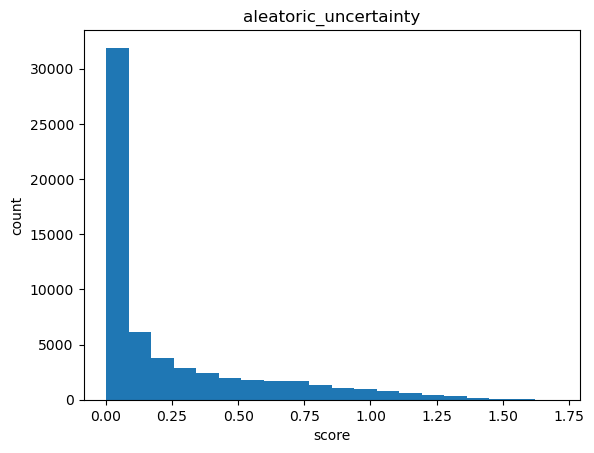

In [43]:
# aleatoric_uncertainty
aleatoric_uncertainty_path = os.path.join(hardness_dir, 'uncertainty_results', "full_wrn28-1_aleatoric_uncertainty.json")

with open(aleatoric_uncertainty_path, 'r') as f:
    aleatoric_uncertainty_list = json.load(f).items() # list of (index, score) pairs
    aleatoric_uncertainty_list = [(int(k), float(v)) for k, v in aleatoric_uncertainty_list]
    
# sort the list by the order of the image
aleatoric_uncertainty_list = sorted(aleatoric_uncertainty_list, key=lambda x: int(x[0]))
scores = np.array(aleatoric_uncertainty_list)[:, 1]
print(f"aleatoric_uncertainty shape: {scores.shape}")
print(f"\tmax: {max(scores)}")
with open(os.path.join(hardness_save_dir, f"aleatoric_uncertainty_score.pkl"), "wb") as f:
    pickle.dump(scores, f)
    
plot_hist(scores, "aleatoric_uncertainty", "score", "count")

epistemic_uncertainty shape: (60000,)
	max: 0.054791159927845


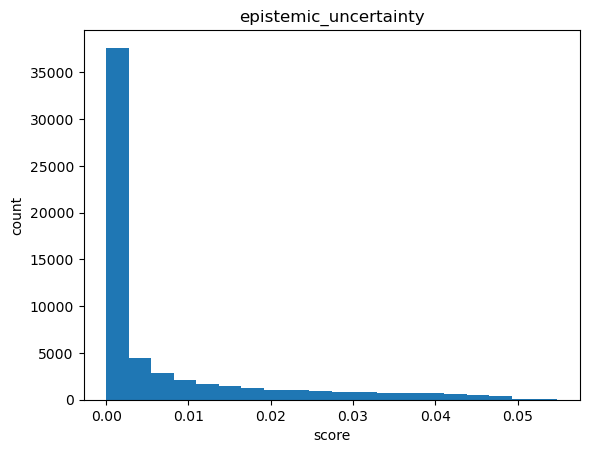

In [44]:
# epistemic_uncertainty
epistemic_uncertainty_path = os.path.join(hardness_dir, 'uncertainty_results', "full_wrn28-1_epistemic_uncertainty.json")

with open(epistemic_uncertainty_path, 'r') as f:
    epistemic_uncertainty_list = json.load(f).items() # list of (index, score) pairs
    epistemic_uncertainty_list = [(int(k), float(v)) for k, v in epistemic_uncertainty_list]
    
# sort the list by the order of the image
epistemic_uncertainty_list = sorted(epistemic_uncertainty_list, key=lambda x: int(x[0]))
scores = np.array(epistemic_uncertainty_list)[:, 1]
print(f"epistemic_uncertainty shape: {scores.shape}")
print(f"\tmax: {max(scores)}")
with open(os.path.join(hardness_save_dir, f"epistemic_uncertainty_score.pkl"), "wb") as f:
    pickle.dump(scores, f)
    
plot_hist(scores, "epistemic_uncertainty", "score", "count")